# 01. 決済方法ごとの比較

## 1-1. データの読み込み

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import japanize_matplotlib
import matplotlib.ticker as mtick

In [8]:
# 2022年のデータを読み込み
df = pd.read_csv("../data/customer_shopping_data_2022.csv")

# 「invoice_date」を日付型に変換
df["invoice_date"] = pd.to_datetime(df["invoice_date"], errors="coerce")

In [13]:
# 先頭確認
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_amount,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,7502.00,20s
1,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,7502.00,20s
2,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,40.66,40s
3,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity,20.92,30s
4,I139207,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall,15.15,20s


## 1-2. 決済方法ごとに売上高と取引件数を集計

In [35]:
# 決済方法別の売上集計
summary_by_payment = df.groupby("payment_method")["total_amount"].agg(
    total_sales = "sum",
    transaction_count = "count"
).sort_values("total_sales", ascending=False)

# 確認
summary_by_payment

,total_sales,transaction_count
payment_method,,
Cash,51697544.18,20380
Credit Card,40275865.45,16052
Debit Card,23463404.45,9119


# 02. 決済方法べつの売上集計と取引件数を可視化

## 2-1. 売上を棒グラフで可視化・画像を保存

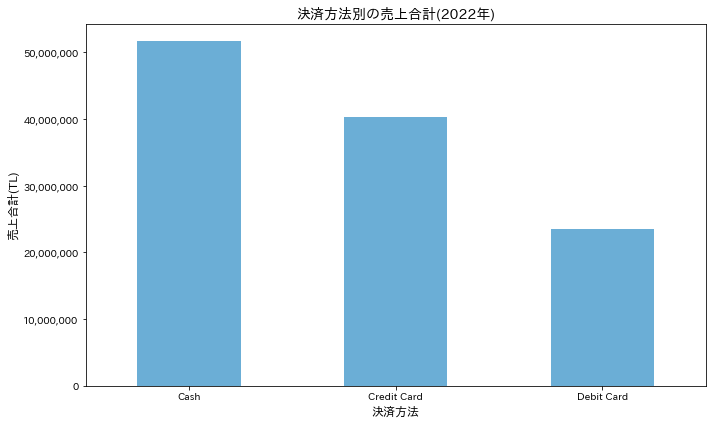

In [41]:
# 売上合計の棒グラフ

fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
summary_by_payment["total_sales"].plot(kind="bar", color="#6baed6", ax=ax)

ax.set_title("決済方法別の売上合計(2022年)", fontsize=14)
ax.set_xlabel("決済方法", fontsize=12)
ax.set_ylabel("売上合計(TL)", fontsize=12)

# x軸ラベルを横向きにする
ax.tick_params(axis="x", labelrotation=0)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

# グラフを描画、画像を保存
plt.tight_layout()
plt.savefig("../output/total_sales_by_payment_method.png", dpi=300, bbox_inches="tight")
plt.show()

## 2-2. 取引件数を棒グラフで可視化・画像を保存

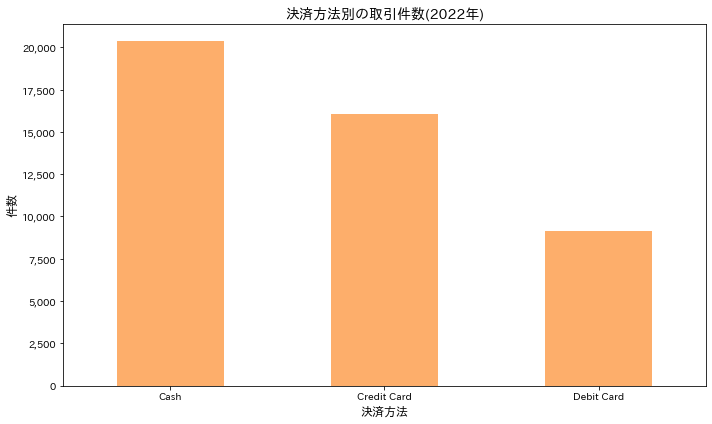

In [45]:
# 取引件数の棒グラフ

fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
summary_by_payment["transaction_count"].plot(kind="bar", color="#fdae6b", ax=ax)

ax.set_title("決済方法別の取引件数(2022年)", fontsize=14)
ax.set_xlabel("決済方法", fontsize=12)
ax.set_ylabel("件数", fontsize=12)

# x軸ラベルを横向きに
ax.tick_params(axis="x", labelrotation=0)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))

# グラフを描画、画像を保存
plt.tight_layout()
plt.savefig("../output/transaction_count_by_payment_method.png",
            dpi=300, bbox_inches="tight")
plt.show()

## 決済方法別の売上と取引件数集計（2022年）

このセクションでは、2022年における決済方法別（現金・クレジットカード・デビットカード）の売上傾向と、取引件数を可視化した。

- データ集計は`df.groupby("payment_method")["total_amount"].agg(total_sales = "sum",transaction_count = "count").sort_values("total_sales", ascending=False)`により実施
- 決済方法は、Cash: 「現金」、Credit Card: 「クレジットカード」、Debit Card: 「デビットカード」で分類
- グラフは棒グラフ形式で可視化

### 考察メモ

- 売上、取引件数ともに、デビットカード、クレジットカード、現金の順番で多くなっている。

### 保存ファイル
- グラフ画像は`output/`ディレクトリにそれぞれ保存済み